**Linear and Logistic Regression Implementation**

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

In [27]:
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 
    'AGE',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']

dataframe = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', delim_whitespace=True, names=names, header= None)
print(dataframe.head())

/var/folders/f9/90wwjvpx6q19zxvhrf6_3rc80000gn/T/ipykernel_1183/1495878117.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', delim_whitespace=True, names=names, header= None)


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [28]:
y = dataframe['PRICE'].to_numpy()
print(type(y))

<class 'numpy.ndarray'>


In [29]:
y_average = round(np.mean(y), 2)
print(f"The average price of a house in Boston is:{y_average: .2f} thousand dollars")
houses_over_40k = sum(y > 40)/ len(y)
print(f"Percentage of houses over 40k: {houses_over_40k:.1%} ")
x = dataframe['RM'].to_numpy()
print(type(x))



The average price of a house in Boston is: 22.53 thousand dollars
Percentage of houses over 40k: 6.1% 
<class 'numpy.ndarray'>


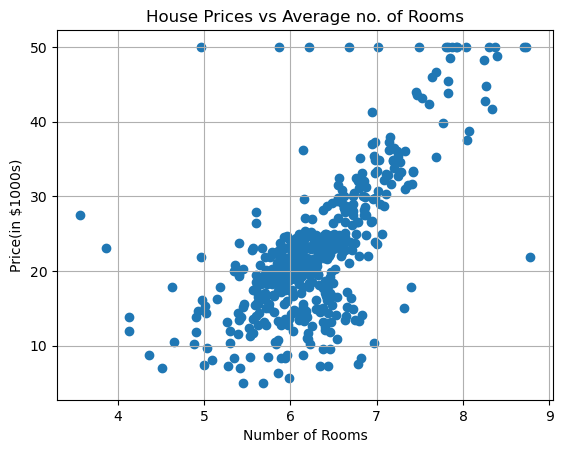

In [30]:
plt.scatter(x, y)
plt.xlabel('Number of Rooms')
plt.ylabel('Price(in $1000s)')
plt.title('House Prices vs Average no. of Rooms')
plt.grid(True)
plt.show()

In [31]:
def linear_regression(x,y):
    x_bar = np.sum(x)/len(x)
    y_bar = np.sum(y)/len(y)


    weight = np.sum((x - x_bar) * (y - y_bar))/ np.sum(np.square(x - x_bar))
    bias = y_bar - weight * x_bar

    return weight, bias

In [ ]:
w, b = linear_regression(x,y)
print('w = {0:5.1f}, b = {1:5.1f}'.format(w,b))


w =   9.1, b = -34.7


In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
w, b = linear_regression(X_train, y_train)
y_pred = w * X_test + b

Mse = np.mean(np.square(y_test - y_pred))
print(f'Mean Squared Error: {Mse:.2f}')


Mean Squared Error: 46.14


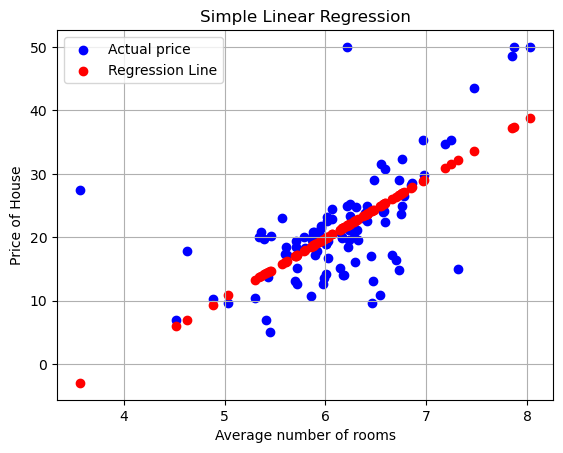

In [35]:
plt.scatter(X_test, y_test, color = 'blue', label = 'Actual price')
plt.scatter(X_test, y_pred, color = 'red', label = 'Regression Line')
plt.xlabel('Average number of rooms')
plt.ylabel('Price of House')
plt.title('Simple Linear Regression')
plt.grid(True)
plt.legend()
plt.show()

In [21]:
def multiple_linear_regression(x, y):

    X = np.c_[np.ones(x.shape[0]), x]
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

X = dataframe.drop(columns=['PRICE']).values
y = dataframe['PRICE'].values

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
w = multiple_linear_regression(X_train, y_train)
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]
y_pred = X_test_bias @ w

mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Mean Squared Error: 24.29
Root Mean Squared Error: 4.93


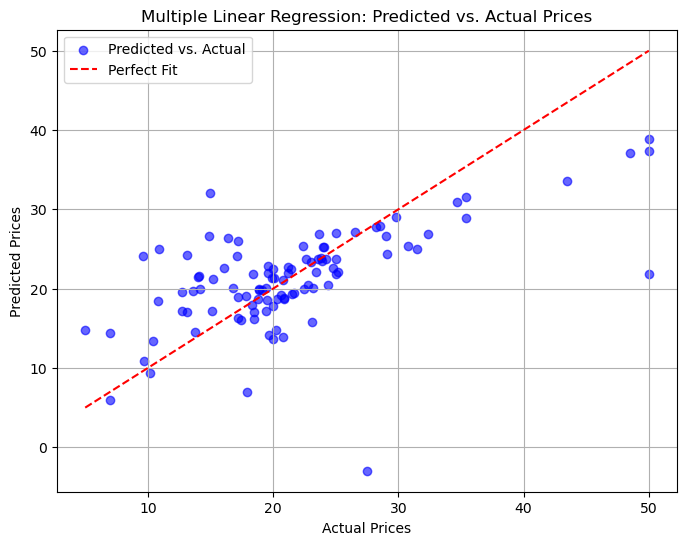

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Predicted vs. Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--", label="Perfect Fit")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Multiple Linear Regression: Predicted vs. Actual Prices")
plt.grid(True)
plt.legend()
plt.show()
